In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
546,48,M,NAP,132,220,1,ST,162,N,0.0,Flat,1
867,44,M,ASY,112,290,0,LVH,153,N,0.0,Up,1
168,58,M,ASY,135,222,0,Normal,100,N,0.0,Up,0
131,46,M,ASY,110,202,0,Normal,150,Y,0.0,Flat,1
395,38,M,ASY,135,0,1,Normal,150,N,0.0,Flat,1


- Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age

### Attribute Information
- Age: age of the patient (in yeara)
- Sex: sex of the patient (M: Male, F: Female)
- ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
- RestingBP: resting blood pressure (in mm Hg)
- Cholesterol: serum cholesterol (in mm/dl)
- FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
- RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- MaxHR: maximum heart rate achieved
- ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
- Oldpeak: oldpeak = ST (Numeric value measured in depression)
- ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
- HeartDisease: output class (1: heart disease, 0: Normal)

In [4]:
df.shape

(918, 12)

No. of Rows: 918  
No. of Columns: 12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##### Numerical columns: 7
1) Age
2) RestingBP
3) Cholesterol
4) FastingBS
5) MaxHR
6) Oldpeak
7) HeartDisease (Target Variable)

##### Categorical columns: 5
1) Sex
2) ChestPainType
3) RestingECG
4) ExerciseAngina
5) ST_Slope

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##### No null values

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Detecting Outliers

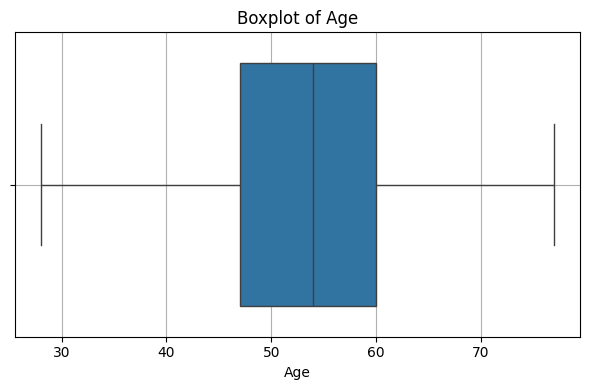

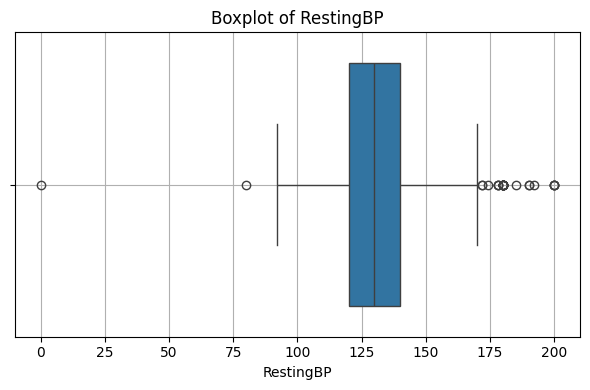

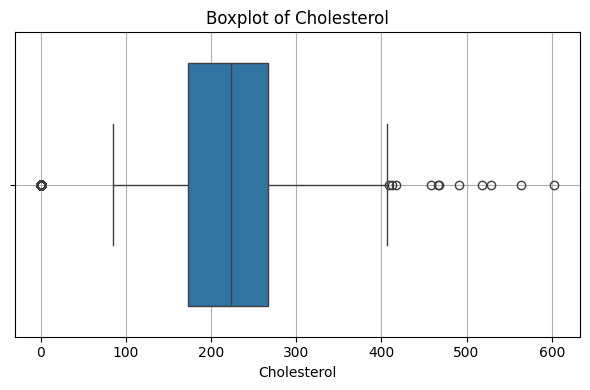

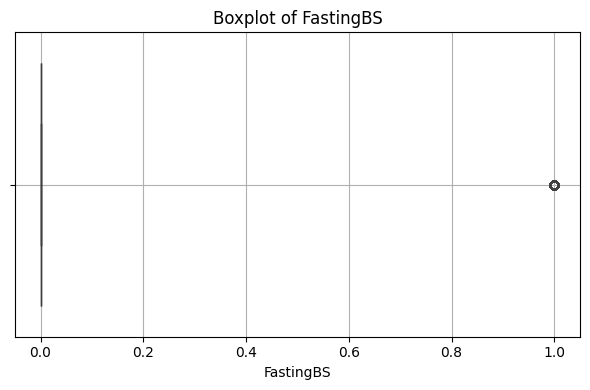

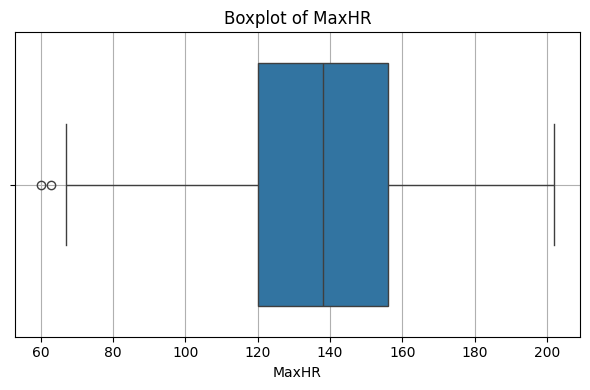

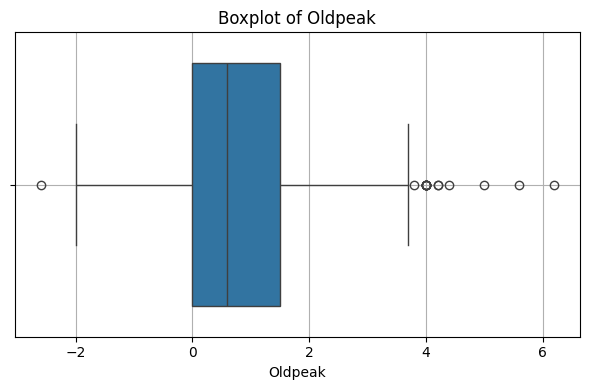

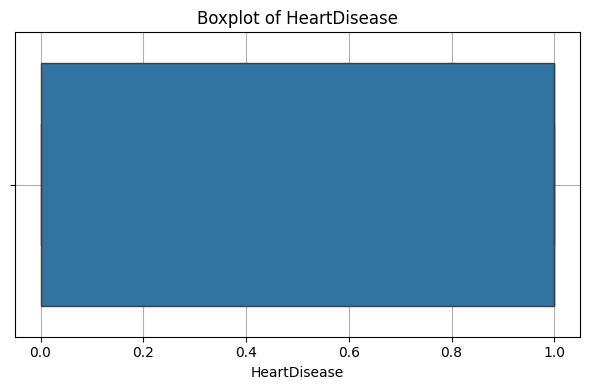

In [8]:
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Outlier Handling

In [9]:
df = df[df['RestingBP'] > 0]  # Remove invalid BP
df['RestingBP'] = df['RestingBP'].clip(upper=200)

##### Medical Insight
- Normal BP: 90–120 mmHg
- Hypertension: > 130 mmHg
- < 80 or > 200 = suspect input error unless clinically valid

In [10]:
df = df[df['Cholesterol'] > 0]  # Remove invalid Cholesterol Level
df['Cholesterol'] = df['Cholesterol'].clip(upper=500)

##### Medical Insight
- Total cholesterol > 240 mg/dL is considered high.
- Extremely high values (> 500) are rare but possible (familial hypercholesterolemia).

In [11]:
df['MaxHR_expected'] = 220 - df['Age'] ## Calculate expected MaxHR

# Keep MaxHR in a 60%–110% range of expected
df = df[
    (df['MaxHR'] >= 0.6 * df['MaxHR_expected']) &
    (df['MaxHR'] <= 1.1 * df['MaxHR_expected'])
]

df.drop(columns=['MaxHR_expected'], inplace=True)

##### Medical Insight
- Actual MaxHR during stress tests is often ~60–85% of predicted MaxHR
- For ischemic patients, reaching even 70% of MaxHR can be clinically sufficient
- Failure to reach 85% of MaxHR is considered a sign of chronotropic incompetence

In [12]:
df['Oldpeak'] = df['Oldpeak'].clip(upper=5)

##### Medical Insight
- Oldpeak refers to ST depression on ECG (in mm), induced by exercise relative to rest.
- Normal: 0 mm
- Mild-moderate ischemia: 1–2 mm
- Severe ischemia: > 2 mm
- Extremely rare to see > 5 mm

In [13]:
df.shape

(700, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             700 non-null    int64  
 1   Sex             700 non-null    object 
 2   ChestPainType   700 non-null    object 
 3   RestingBP       700 non-null    int64  
 4   Cholesterol     700 non-null    int64  
 5   FastingBS       700 non-null    int64  
 6   RestingECG      700 non-null    object 
 7   MaxHR           700 non-null    int64  
 8   ExerciseAngina  700 non-null    object 
 9   Oldpeak         700 non-null    float64
 10  ST_Slope        700 non-null    object 
 11  HeartDisease    700 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 71.1+ KB


## Encoding

#### Categorical columns
1) Sex
2) ChestPainType
3) RestingECG
4) ExerciseAngina
5) ST_Slope

In [15]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

##### Label Encoding (Simple Binary)
This replaces 'M' with 1 and 'F' with 0 (or vice versa).

In [16]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

In [17]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Chest pain types like ATA (Atypical Angina), NAP (Non-Anginal Pain), ASY (Asymptomatic), and TA (Typical Angina) are not considered ordinal.  
They represent different categories of chest pain, rather than a ranked order of severity or intensity. 
##### One-Hot Encoding

In [18]:
# Strip whitespace and convert to uppercase (if needed)
df['ChestPainType'] = df['ChestPainType'].str.strip().str.upper()


In [19]:
# Set desired category order manually (NAP(least likely to be associated with CVDs) → will be dropped)
encoder = OneHotEncoder(
    categories=[['NAP', 'ATA', 'ASY', 'TA']],
    drop='first',
    sparse_output=False
)

# Fit and transform
encoded = encoder.fit_transform(df[['ChestPainType']])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['ChestPainType']),
    index=df.index  
)


# Combine
df = pd.concat([df.drop('ChestPainType', axis=1), encoded_df], axis=1)